### Импорт библиотек

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Загрузка файла

In [162]:
data = pd.read_excel('alldata.xlsx',index_col = 0)
data.head(20)

,X4,X8,X21,X36,X42,C1
Оренбургский,36.8,33.4,1.9,53979.9,317,1.0
г.Новотроицк,38.8,53.1,1.3,112232.3,195,1.0
Акбулакский,35.6,23.6,3.1,5640.7,11,2.0
Соль-Илецкий,35.8,21.9,1.6,1181.7,3,2.0
Ташлинский,36.7,26.2,3.1,3715.9,11,2.0
г.Соль-Илецк,36.6,30.3,2.2,12219.6,28,2.0
Беляевский,37.6,25.8,9.3,3994.3,6,3.0
Сорочинский,39.2,39.2,9.6,635.5,1,3.0
Александровский,38.0,46.7,2.5,3487.7,4,4.0
Курманаевский,40.3,45.4,1.6,6775.2,4,4.0


### Деление на обучающую и тестовую выборку

In [163]:
train = data [data['C1'].notna()]
train.head()

,X4,X8,X21,X36,X42,C1
Оренбургский,36.8,33.4,1.9,53979.9,317,1.0
г.Новотроицк,38.8,53.1,1.3,112232.3,195,1.0
Акбулакский,35.6,23.6,3.1,5640.7,11,2.0
Соль-Илецкий,35.8,21.9,1.6,1181.7,3,2.0
Ташлинский,36.7,26.2,3.1,3715.9,11,2.0


In [164]:
test = data [data['C1'].isna()]
test.head()

,X4,X8,X21,X36,X42,C1
Абдулинский,44.1,93.1,2.4,742.3,1,NaN
Адамовский,35.3,23.4,1.4,6450.3,8,NaN
Асекеевский,42.2,44.0,0.8,2877.2,5,NaN
Бугурусланский,39.4,27.3,0.9,1970.9,14,NaN
Бузулукский,39.6,50.8,0.4,1660.7,11,NaN


In [165]:
k = train['C1'].nunique()
k

4

### Формирование желаемых векторов

In [166]:
y = train['C1'].values.reshape (-1,1).astype('int')
d_all = np.zeros((y.shape[0],k))
for i in range (len(y)):
    d_all[i][y[i]-1] = 1

In [167]:
d_all

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [168]:
train = train.drop (columns = ['C1'])
train.head()

,X4,X8,X21,X36,X42
Оренбургский,36.8,33.4,1.9,53979.9,317
г.Новотроицк,38.8,53.1,1.3,112232.3,195
Акбулакский,35.6,23.6,3.1,5640.7,11
Соль-Илецкий,35.8,21.9,1.6,1181.7,3
Ташлинский,36.7,26.2,3.1,3715.9,11


### Стандартизация обучающей выборки

In [169]:
mean_train = train.mean()
std_train = train.std()
train = (train - mean_train)/std_train
train

,X4,X8,X21,X36,X42
Оренбургский,-0.700521,-0.414585,-0.536131,1.158681,2.803996
г.Новотроицк,0.546982,1.218879,-0.752805,2.994437,1.535198
Акбулакский,-1.449023,-1.227170,-0.102782,-0.364673,-0.378399
Соль-Илецкий,-1.324273,-1.368129,-0.644468,-0.505193,-0.461599
Ташлинский,-0.762896,-1.011586,-0.102782,-0.425331,-0.378399
г.Соль-Илецк,-0.825272,-0.671627,-0.427793,-0.157346,-0.201600
Беляевский,-0.201520,-1.044753,2.136189,-0.416557,-0.430399
Сорочинский,0.796483,0.066334,2.244527,-0.522406,-0.482399
Александровский,0.047981,0.688210,-0.319456,-0.432522,-0.451199
Курманаевский,1.482610,0.580418,-0.644468,-0.328920,-0.451199


### Определение числа скрытых слоев и инициализация весов

In [170]:
hidden = 9

In [171]:
w1 = np.random.rand(hidden,train.shape[1])

In [172]:
w1

array([[0.59655783, 0.67680007, 0.92967367, 0.76256401, 0.07454439],
       [0.11026984, 0.11990153, 0.45425274, 0.14740661, 0.03207697],
       [0.45896961, 0.18692326, 0.55350096, 0.19383426, 0.02109703],
       [0.67449396, 0.93115507, 0.84919889, 0.81717389, 0.9434623 ],
       [0.01432701, 0.61327768, 0.60093903, 0.05107746, 0.27870851],
       [0.89545114, 0.48353571, 0.95051106, 0.78179329, 0.89381226],
       [0.37778738, 0.86673104, 0.76541737, 0.54162132, 0.10945346],
       [0.55754456, 0.63744824, 0.05754619, 0.73659855, 0.24631497],
       [0.55000539, 0.47988865, 0.79180275, 0.34660216, 0.04490352]])

In [173]:
w2 = np.random.rand (k,hidden)
w2

array([[0.31906532, 0.13088681, 0.59160578, 0.34946851, 0.27394353,
        0.38376376, 0.14178138, 0.17973195, 0.69740649],
       [0.95467306, 0.78887632, 0.26284102, 0.25524283, 0.8439402 ,
        0.76611271, 0.0485707 , 0.93429634, 0.86995176],
       [0.99414263, 0.96732525, 0.88881923, 0.06064816, 0.08967394,
        0.22026695, 0.37362885, 0.08571129, 0.04637016],
       [0.61765121, 0.42494511, 0.63067157, 0.15728497, 0.08736779,
        0.67617806, 0.94365444, 0.92553814, 0.16173181]])

### Обучение

In [174]:
epoch = 50
mse = 0
d = {}
for i in range (epoch):
    for j in range (train.shape[0]) :
        x = train.values[j].reshape (train.shape[1],1)
        s1 = w1@x
        sigm_s1 = 1/(1+np.exp(-s1))
        s2 = w2@sigm_s1
        sigm_s2 = 1/(1+np.exp(-s2))
        mse += np.sum ((sigm_s2-d_all[j].reshape(-1,1))**2)/2
        delta_2 = (sigm_s2-d_all[j].reshape(-1,1))*(sigm_s2*(1-sigm_s2)) 
        delta_1 = w2.T@delta_2
        w2 -= 0.1 * delta_2@sigm_s1.T
        w1 -= 0.1 * delta_1@x.T
    d[i] = mse
    mse = 0

### График ошибки сети

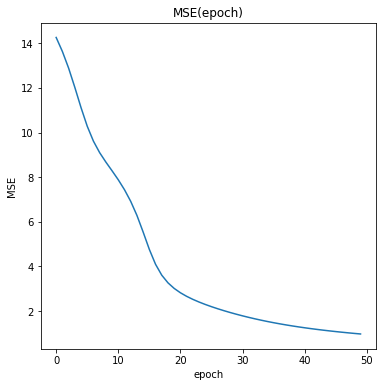

In [175]:
plt.figure(figsize = (6,6))
plt.title ('MSE(epoch)')
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.plot(d.keys(),d.values())

### Итоговые матрицы весов

In [176]:
w1

array([[ 0.98330497,  0.3268064 ,  2.73230424, -0.51302067, -1.29390737],
       [-0.54590211, -1.68382358,  2.49507019, -1.99996363, -2.48978437],
       [ 1.95749594,  1.20831701,  2.4874005 ,  0.54121358,  0.5795269 ],
       [ 0.65959741,  1.23142887,  0.22465913,  2.06405712,  2.28993192],
       [-2.11958392, -1.52575601, -0.61987045, -0.49810077, -0.74426832],
       [ 1.04176139,  1.10106142, -0.2555574 ,  1.03316027,  1.13303835],
       [ 2.54433237,  3.20901059,  0.27179584, -1.35017953, -1.41040479],
       [ 0.58455547,  1.732866  , -3.64062653, -1.34586773, -1.89142327],
       [-1.07603753, -0.63663482, -0.77047385,  2.0734067 ,  1.45135481]])

In [177]:
w2

array([[-0.65115832, -1.27836368, -0.04434341,  0.40357829, -0.70218928,
         0.27416936, -0.76684013, -0.66204085,  0.54282634],
       [-0.2423932 ,  0.46631167, -1.11399644, -0.91664101,  0.65025192,
        -0.47990924, -1.21277983,  0.17010729,  0.31268029],
       [ 0.7231818 ,  0.42907041,  0.49466599, -0.75443411, -0.91313165,
        -0.57079415, -0.4005429 , -1.36339416, -0.93109192],
       [ 0.04193677, -0.81817239, -0.07522126, -0.44892597, -1.03578418,
         0.09820198,  0.87612031,  1.11666643, -0.97974672]])

### Загрузка и стандартизация тестовой выборки

In [178]:
test = pd.read_excel('test.xlsx',index_col = 0)
test

,X4,X8,X21,X36,X42
Абдулинский,44.1,93.1,2.4,742.3,1
Адамовский,35.3,23.4,1.4,6450.3,8
Асекеевский,42.2,44.0,0.8,2877.2,5
Бугурусланский,39.4,27.3,0.9,1970.9,14
Бузулукский,39.6,50.8,0.4,1660.7,11
Гайский,38.0,9.1,0.0,802.3,4
Грачевский,39.9,47.2,0.5,2884.0,3
Домбаровский,34.7,37.5,1.5,3483.5,11
Илекский,38.0,59.4,2.9,3988.8,8
Кваркенский,37.4,56.9,3.1,4991.0,6


In [179]:
test = (test - mean_train) / std_train
test

,X4,X8,X21,X36,X42
Абдулинский,3.852867,4.535555,-0.355569,-0.519040,-0.482399
Адамовский,-1.636149,-1.243754,-0.716693,-0.339159,-0.409599
Асекеевский,2.667738,0.464335,-0.933368,-0.451761,-0.440799
Бугурусланский,0.921233,-0.920378,-0.897255,-0.480322,-0.347199
Бузулукский,1.045984,1.028170,-1.077817,-0.490098,-0.378399
Гайский,0.047981,-2.429466,-1.222267,-0.517149,-0.451199
Грачевский,1.233109,0.729669,-1.041705,-0.451547,-0.461599
Домбаровский,-2.010400,-0.074625,-0.680581,-0.432654,-0.378399
Илекский,0.047981,1.741255,-0.175006,-0.416730,-0.409599
Кваркенский,-0.326270,1.533963,-0.102782,-0.385147,-0.430399


### Предсказание

In [180]:
d_train = {}
for j in range (train.shape[0]) :
        x = train.values[j].reshape (train.shape[1],1)
        s1 = w1@x
        sigm_s1 = 1/(1+np.exp(-s1))
        s2 = w2@sigm_s1
        sigm_s2 = 1/(1+np.exp(-s2))
        d_train[train.index[j]] = np.argmax(sigm_s2)+1

In [181]:
d_test ={}
for j in range (test.shape[0]) :
        x = test.values[j].reshape (train.shape[1],1)
        s1 = w1@x
        sigm_s1 = 1/(1+np.exp(-s1))
        s2 = w2@sigm_s1
        sigm_s2 = 1/(1+np.exp(-s2))
        d_test[test.index[j]] = np.argmax(sigm_s2)+1

In [182]:
df_train = pd.DataFrame.from_dict(data = d_train, orient = 'index',columns = ['Класс'])
df_train

,Класс
Оренбургский,1
г.Новотроицк,1
Акбулакский,2
Соль-Илецкий,2
Ташлинский,2
г.Соль-Илецк,2
Беляевский,3
Сорочинский,3
Александровский,4
Курманаевский,4


In [183]:
df_test = pd.DataFrame.from_dict(data = d_test, orient = 'index',columns = ['Класс'])
df_test

,Класс
Абдулинский,4
Адамовский,2
Асекеевский,4
Бугурусланский,4
Бузулукский,4
Гайский,2
Грачевский,4
Домбаровский,2
Илекский,4
Кваркенский,4


### Выгрузка в эксель

In [184]:
df_train.to_excel('train_res.xlsx')
df_test.to_excel('test_res.xlsx')